In [1]:
import mygene
from tqdm import tqdm
import pandas as pd

In [2]:
!pwd


/12tb_dsk1/danish/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf/differential_expression_analysis


In [3]:
!ls /12tb_dsk1/danish//Gene_Regulatory_Network_ROSMAP/code/preprocessing_18_dec

 Dashboard_clnical_data
 Machine_learning_and_PCA_on_expression_data.ipynb
 clinical_data_AD_NCI_preprocessed.csv
 clinical_data_AD_NCI_preprocessed_removed_batch_0.csv
 clinical_data_AD_NCI_raw.csv
 count_matrix_AD_NCI_preprocessed.csv
 count_matrix_AD_NCI_preprocessed_removed_batch_0.csv
 count_matrix_AD_NCI_raw.csv
 count_matrix_after_iteration_1_batch.csv
 count_matrix_after_iteration_2_batch.csv
 count_matrix_after_iteration_3_batch.csv
 count_matrix_combatseq_sub_batch_corrected.csv
 cy-style.json
 data.json
 data_preprocessing.ipynb
 final_preprocessed_clinical_data.csv
 final_preprocessed_count_matrix.csv
 final_preprocessed_count_matrix_mrn_normalized.csv
 model_best_logistic_regression.sav
'pca_batch(filtered_ad_non_ad_mrn_batch_corrected).html'


In [4]:
count_matrix = pd.read_csv('/12tb_dsk1/danish//Gene_Regulatory_Network_ROSMAP/code/preprocessing_18_dec/count_matrix_AD_NCI_raw.csv',index_col=0)

In [5]:
count_matrix

,23_120411,591_120522,943_131101,604_120523,545_120516,364_120502,705_120605,711_120531,602_120523,229_120425,...,882_130918,587_120522,168_120423,954_131107,283_120430,677_120604,142_120419,120_120418,483_120515,174_120424
ENSG00000182870,1865,1941,1261,2178,824,1448,1475,1132,3065,1063,...,1392,1811,2634,672,2170,923,1530,1015,3054,1025
ENSG00000039523,2180,2544,2339,2850,1033,1722,1664,1477,3414,1087,...,2126,1893,2444,1295,2051,1085,1992,1551,2988,1526
ENSG00000198142,83,116,218,177,51,53,75,106,105,43,...,224,64,57,195,54,69,76,84,72,95
ENSG00000182366,42,45,53,79,14,47,35,28,89,17,...,17,31,89,2,37,15,9,9,121,4
ENSG00000168490,11584,19678,15168,23290,4935,8611,8229,7415,21563,8881,...,10643,11961,21087,3432,16578,5067,13165,8362,26542,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,325,372,431,430,265,347,319,248,498,263,...,317,423,371,191,356,184,276,267,374,254
ENSG00000134824,5240,3940,4211,4877,2089,2857,2746,6162,4732,1929,...,7420,1689,2960,4846,2722,2762,3501,3266,4627,5730
ENSG00000127586,435,420,371,1025,222,304,283,234,439,213,...,321,263,484,199,422,183,447,348,432,253
ENSG00000104915,710,838,1019,1135,546,725,813,653,1093,543,...,1008,866,739,649,667,480,605,910,797,892


In [6]:
AD_filtered_data = pd.read_csv('../AD_filtered_data.csv', index_col=0)

In [7]:
count_matrix =count_matrix[AD_filtered_data.columns]

In [8]:
count_matrix = count_matrix.T 

In [9]:
import pickle

# Step 4: Load the list from the pickle file
with open('../cluster_list.pkl', 'rb') as file:
    cluster_list = pickle.load(file)

print("List loaded from my_list.pkl:")
print(cluster_list)

List loaded from my_list.pkl:
[['23_120411.csv', '193_120424.csv', '76_120417.csv', '197_120424.csv', '326_120501.csv', '628_120524.csv', '520_120515.csv', '214_120425.csv', '497_120515.csv', '228_120425.csv', '350_120501.csv', '363_120502.csv', '637_120524.csv', '232_120425.csv', '429_120507.csv', '56_120417.csv', '444_120507.csv', '292_120430.csv', '494_120515.csv', '304_120430.csv', '34_120416.csv', '181_120424.csv', '231_120425.csv', '703_120605.csv', '355_120501.csv', '482_120514.csv', '952_131107.csv', '704_120605.csv', '531_120516.csv', '309_120430.csv', '02_120405.csv', '173_120424.csv', '407_120503.csv', '649_120529.csv', '434_120507.csv', '635_120524.csv', '942_131101.csv', '689_120604.csv'], ['243_120426.csv', '424_120507.csv', '36_120416.csv', '323_120501.csv', '24_120411.csv', '721_120531.csv', '607_120523.csv', '604_120523.csv', '286_120430.csv', '12_120410.csv', '77_120417.csv', '591_120522.csv', '715_120531.csv', '459_120514.csv', '202_120424.csv', '711_120531.csv', '70

In [10]:
def return_cluster(name):
    name = name + '.csv'

    if name in cluster_list[0]:
        return 'A'
    elif name in cluster_list[1]:
        return 'B'
    elif name in cluster_list[2]:
        return 'C'
    

In [11]:
x = []
for i in count_matrix.index:
    x.append(return_cluster(i))

In [12]:
meta_data = pd.DataFrame(x, columns=["condition"], index=count_matrix.index)

In [13]:
count_matrix = count_matrix.T

In [14]:
count_matrix

,424_120507,444_120507,497_120515,232_120425,602_120523,545_120516,553_120517,711_120531,309_120430,520_120515,...,186_120424,76_120417,469_120514,363_120502,326_120501,591_120522,494_120515,197_120424,407_120503,554_120517
ENSG00000182870,628,1554,1433,2974,3065,824,1220,1132,1243,3304,...,599,1878,720,1769,1805,1941,2753,2125,1053,1717
ENSG00000039523,960,2196,1852,2743,3414,1033,1598,1477,1963,2958,...,727,2134,1088,2371,2110,2544,2800,2538,1424,2030
ENSG00000198142,63,85,65,97,105,51,86,106,77,89,...,51,110,55,112,83,116,171,104,61,70
ENSG00000182366,14,29,31,116,89,14,16,28,15,89,...,10,15,9,34,74,45,129,70,26,43
ENSG00000168490,2815,11549,9530,27287,21563,4935,7388,7415,7831,22714,...,3386,7373,2837,11726,14344,19678,22062,16529,6691,11039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,90,306,261,644,498,265,226,248,370,511,...,149,342,150,369,459,372,369,446,234,439
ENSG00000134824,2090,5358,2336,4753,4732,2089,3289,6162,2360,2839,...,1451,2223,2251,5109,2501,3940,5216,4266,2090,2850
ENSG00000127586,165,346,303,579,439,222,356,234,302,345,...,178,259,101,423,429,420,613,488,202,316
ENSG00000104915,518,1024,731,1174,1093,546,942,653,809,1099,...,456,952,521,932,938,838,1260,976,689,809


In [15]:
count_matrix.to_csv('count_matrix_diff_analysis.csv', index=True)
meta_data.to_csv('meta_data_diff_analysis.csv', index=True)

# Run Differential expression analysis and then come back here for result analysis of differential expression analysis

In [16]:
!pwd

/12tb_dsk1/danish/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf/differential_expression_analysis


In [17]:
count_matrix

,424_120507,444_120507,497_120515,232_120425,602_120523,545_120516,553_120517,711_120531,309_120430,520_120515,...,186_120424,76_120417,469_120514,363_120502,326_120501,591_120522,494_120515,197_120424,407_120503,554_120517
ENSG00000182870,628,1554,1433,2974,3065,824,1220,1132,1243,3304,...,599,1878,720,1769,1805,1941,2753,2125,1053,1717
ENSG00000039523,960,2196,1852,2743,3414,1033,1598,1477,1963,2958,...,727,2134,1088,2371,2110,2544,2800,2538,1424,2030
ENSG00000198142,63,85,65,97,105,51,86,106,77,89,...,51,110,55,112,83,116,171,104,61,70
ENSG00000182366,14,29,31,116,89,14,16,28,15,89,...,10,15,9,34,74,45,129,70,26,43
ENSG00000168490,2815,11549,9530,27287,21563,4935,7388,7415,7831,22714,...,3386,7373,2837,11726,14344,19678,22062,16529,6691,11039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,90,306,261,644,498,265,226,248,370,511,...,149,342,150,369,459,372,369,446,234,439
ENSG00000134824,2090,5358,2336,4753,4732,2089,3289,6162,2360,2839,...,1451,2223,2251,5109,2501,3940,5216,4266,2090,2850
ENSG00000127586,165,346,303,579,439,222,356,234,302,345,...,178,259,101,423,429,420,613,488,202,316
ENSG00000104915,518,1024,731,1174,1093,546,942,653,809,1099,...,456,952,521,932,938,838,1260,976,689,809


In [18]:
result_analysis_A_B = pd.read_csv('./different_expression_output/A_B/results.csv', index_col=0)
result_analysis_A_C = pd.read_csv('./different_expression_output/A_C/results.csv', index_col=0)
result_analysis_B_C = pd.read_csv('./different_expression_output/B_C/results.csv', index_col=0)

In [19]:
result_analysis_A_B.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000170522,381.245826,-0.345143,0.059314,-5.818951,5.921821e-09,0.000103
ENSG00000153714,91.494706,-0.389987,0.081400,-4.790985,1.659647e-06,0.014381
ENSG00000160712,363.692795,0.557109,0.122052,4.564529,5.006178e-06,0.028919
ENSG00000104368,424.795879,0.528593,0.120301,4.393937,1.113158e-05,0.032152
ENSG00000085831,142.589024,-0.436968,0.097551,-4.479369,7.486401e-06,0.032152
ENSG00000121207,61.347521,0.635955,0.144038,4.415183,1.009247e-05,0.032152
ENSG00000197142,266.116145,0.634403,0.150748,4.208364,2.572263e-05,0.043053
ENSG00000198959,1686.848424,0.728894,0.170122,4.284529,1.831264e-05,0.043053
ENSG00000184113,3767.364579,0.641487,0.152635,4.202763,2.636772e-05,0.043053
ENSG00000052802,957.084863,-0.361839,0.086262,-4.194666,2.732735e-05,0.043053


In [20]:
result_analysis_A_C.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000177989,75.921218,0.965218,0.203954,4.732524,0.000002,0.038428
ENSG00000126709,2147.520895,0.707953,0.184413,3.838956,0.000124,0.554416
ENSG00000162692,25.551956,1.129376,0.294850,3.830339,0.000128,0.554416
ENSG00000111801,205.523072,0.384129,0.099674,3.853837,0.000116,0.554416
ENSG00000148400,1148.079987,0.098320,0.105833,0.929003,0.352888,0.974815
ENSG00000178821,39.406906,0.179170,0.161389,1.110175,0.266924,0.974815
ENSG00000158710,1096.360608,0.197939,0.161463,1.225907,0.220234,0.974815
ENSG00000213023,705.463153,-0.176035,0.122701,-1.434663,0.151383,0.974815
ENSG00000214872,38.928728,0.187178,0.162829,1.149536,0.250335,0.974815
ENSG00000139988,28.413151,-0.131757,0.117002,-1.126109,0.260119,0.974815


In [21]:
result_analysis_B_C.sort_values(by='padj').head(40)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236308,0.000023,0.393780
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447650
ENSG00000126709,1861.385678,0.794947,0.204743,3.882651,0.000103,0.447650
ENSG00000183628,35.885081,1.305113,0.334754,3.898729,0.000097,0.447650
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725101,0.000195,0.676690
ENSG00000153563,56.584538,0.289258,0.135448,2.135569,0.032715,0.966725
ENSG00000076108,1445.814430,-0.123224,0.057856,-2.129843,0.033185,0.966725
ENSG00000189275,95.302578,-0.430561,0.263508,-1.633961,0.102267,0.966725
ENSG00000244398,38.905570,-0.329846,0.137564,-2.397768,0.016495,0.966725
ENSG00000185022,536.465061,-0.257882,0.226995,-1.136070,0.255927,0.966725


# Volcano Plot
# Preranking running

In [22]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df = result_analysis_A_B

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df = df.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df['ranking_metric'] = -np.log10(df['padj']) * np.sign(df['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/A_B/ranked_list_A_B.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")


Ranked list saved to 'ranked_list.rnk'.


In [23]:
ranked_list

,ranking_metric
ENSG00000160712,1.538816
ENSG00000104368,1.492796
ENSG00000121207,1.492796
ENSG00000197142,1.365997
ENSG00000198959,1.365997
...,...
ENSG00000025772,-1.365031
ENSG00000052802,-1.365997
ENSG00000085831,-1.492796
ENSG00000153714,-1.842216


In [24]:
!pip install biomart
# Import the biomart package
from biomart import BiomartServer

# Connect to the Ensembl Biomart server
server = BiomartServer("http://www.ensembl.org/biomart")

# Access the Ensembl Genes dataset for Homo sapiens
dataset = server.datasets['hsapiens_gene_ensembl']

# Query the dataset for Ensembl IDs and gene names
response = dataset.search({
    'attributes': [
        'ensembl_gene_id', 
        'external_gene_name'
    ]
})

# Convert the response to a dataframe
import pandas as pd
from io import StringIO

data = StringIO(response.text)

df = pd.read_csv(data, sep="\t",header=None)

# Display the first few rows of the dataframe
print(df.head())


Defaulting to user installation because normal site-packages is not writeable
                 0        1
0  ENSG00000210049    MT-TF
1  ENSG00000211459  MT-RNR1
2  ENSG00000210077    MT-TV
3  ENSG00000210082  MT-RNR2
4  ENSG00000209082   MT-TL1


In [26]:
df_ensemble = df.copy()
def return_gene_name(genes):
    x = df_ensemble[df_ensemble[0]==genes][1].values
    try:
        x = x[0]
        return x
    except:
        return genes

In [27]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:42<00:00, 411.12it/s]


,1
IL6R,1.538816
PLAT,1.492796
LRAT,1.492796
ACSL5,1.365997
TGM2,1.365997
...,...
TOMM34,-1.365031
MSMO1,-1.365997
TTC39A,-1.492796
LURAP1L,-1.842216


2024-07-08 10:33:48,454 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:33:48,462 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:33:48,464 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:33:48,464 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:33:48,465 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:33:48,472 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:33:48,472 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 10:33:48,473 [INFO] Start to run GSEA...Might take a while..................


Databases:  WikiPathway_2023_Human


2024-07-08 10:33:57,809 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:33:58,296 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:33:58,305 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:33:58,307 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:33:58,307 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:33:58,308 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:33:58,329 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:33:58,329 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 10:33:58,329 [INFO] Start to run GSEA...Might take a while..................


0                 Cytoplasmic Ribosomal Proteins WP477
1            TYROBP Causal Network In Microglia WP3945
2    Electron Transport Chain OXPHOS System In Mito...
3                Cannabinoid Receptor Signaling WP3869
4    NOTCH1 Regulation Of Endothelial Cell Calcific...
5    Mitochondrial Complex I Assembly Model OXPHOS ...
6                      Synaptic Vesicle Pathway WP2267
7                  Inflammatory Response Pathway WP453
8    Extrafollicular And Follicular B Cell Activati...
9                             Complement System WP2806
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 10:34:20,537 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:34:20,701 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:34:20,710 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:34:20,712 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:34:20,712 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:34:20,712 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:34:20,720 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:34:20,720 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 10:34:20,720 [INFO] Start to run GSEA...Might take a while..................


0                Peptide Chain Elongation R-HSA-156902
1       Eukaryotic Translation Elongation R-HSA-156842
2       Eukaryotic Translation Termination R-HSA-72764
3    Nonsense Mediated Decay (NMD) Independent Of E...
4    Formation Of A Pool Of Free 40S Subunits R-HSA...
5               Selenocysteine Synthesis R-HSA-2408557
6    Response Of EIF2AK4 (GCN2) To Amino Acid Defic...
7    L13a-mediated Translational Silencing Of Cerul...
8    GTP Hydrolysis And Joining Of 60S Ribosomal Su...
9                  Viral mRNA Translation R-HSA-192823
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 10:34:25,486 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:34:25,820 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:34:25,828 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:34:25,831 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:34:25,831 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:34:25,831 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:34:25,840 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:34:25,841 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 10:34:25,841 [INFO] Start to run GSEA...Might take a while..................


0                    Coronavirus disease
1              Oxidative phosphorylation
2             Hematopoietic cell lineage
3        Staphylococcus aureus infection
4                               Ribosome
5                    Allograft rejection
6              Graft-versus-host disease
7             Autoimmune thyroid disease
8    Complement and coagulation cascades
9                     Nicotine addiction
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 10:34:38,584 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:34:38,652 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:34:38,660 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:34:38,663 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:34:38,663 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:34:38,663 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:34:38,672 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:34:38,672 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 10:34:38,672 [INFO] Start to run GSEA...Might take a while..................


0    Voltage-Gated Monoatomic Cation Channel Activi...
1    Voltage-Gated Potassium Channel Activity (GO:0...
2              Potassium Channel Activity (GO:0005267)
3              Cytokine Receptor Activity (GO:0004896)
4    Voltage-Gated Monoatomic Ion Channel Activity ...
5                        Myosin V Binding (GO:0031489)
6    Cadherin Binding Involved In Cell-Cell Adhesio...
7    Transmitter-Gated Monoatomic Ion Channel Activ...
8    High Voltage-Gated Calcium Channel Activity (G...
9    Phosphatidylinositol Phosphate 4-Phosphatase A...
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 10:34:44,585 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:34:44,729 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:34:44,737 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:34:44,739 [WARNING] Duplicated values found in preranked stats: 39.16% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:34:44,739 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:34:44,740 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:34:44,772 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:34:44,773 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 10:34:44,773 [INFO] Start to run GSEA...Might take a while..................


0                                Ribosome (GO:0005840)
1       Cytosolic Large Ribosomal Subunit (GO:0022625)
2                 Large Ribosomal Subunit (GO:0015934)
3                 Small Ribosomal Subunit (GO:0015935)
4       Cytosolic Small Ribosomal Subunit (GO:0022627)
5                       Neuron Projection (GO:0043005)
6    Postsynaptic Specialization Membrane (GO:0099634)
7                 Cell-Substrate Junction (GO:0030055)
8                          Focal Adhesion (GO:0005925)
9    Collagen-Containing Extracellular Matrix (GO:0...
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 10:35:41,772 [INFO] Congratulations. GSEApy runs successfully................



0                 Cytoplasmic Translation (GO:0002181)
1            Peptide Biosynthetic Process (GO:0043043)
2    Proton Motive Force-Driven ATP Synthesis (GO:0...
3             Signal Release From Synapse (GO:0099643)
4    Modulation Of Chemical Synaptic Transmission (...
5      Macromolecule Biosynthetic Process (GO:0009059)
6          Chemical Synaptic Transmission (GO:0007268)
7    Proton Motive Force-Driven Mitochondrial ATP S...
8    Potassium Ion Transmembrane Transport (GO:0071...
9              Neurotransmitter Secretion (GO:0007269)
Name: Term, dtype: object


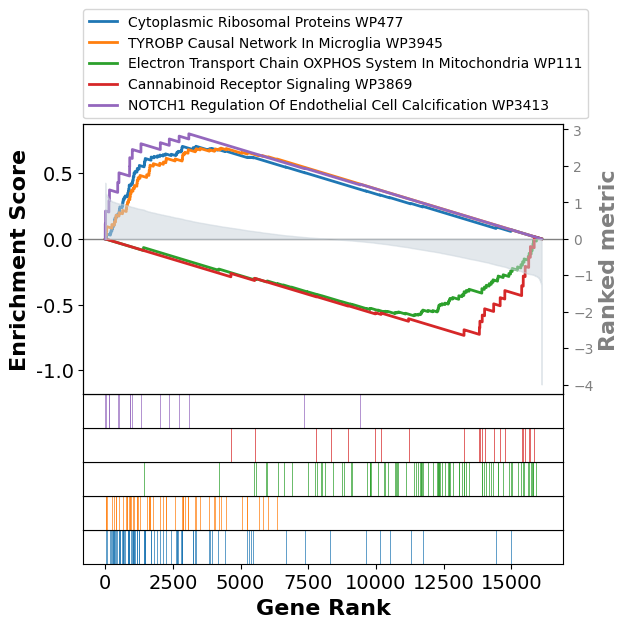

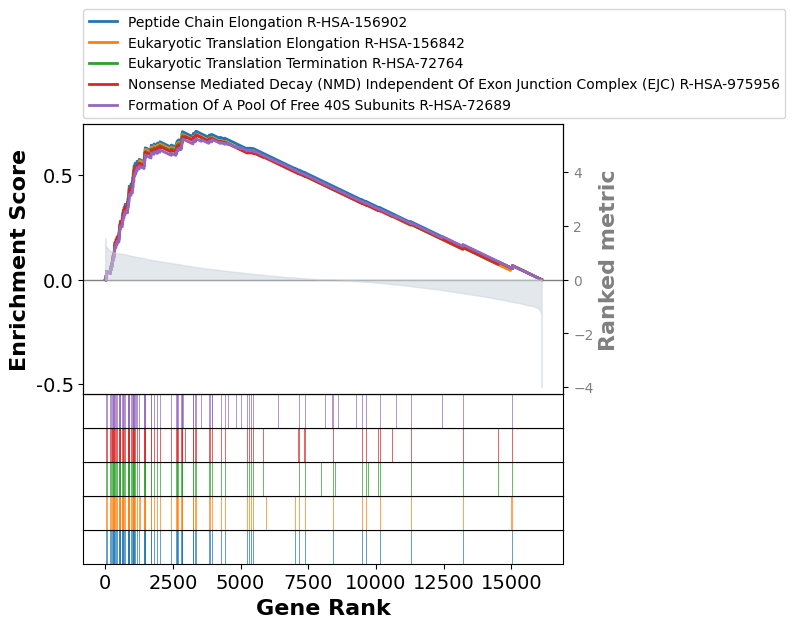

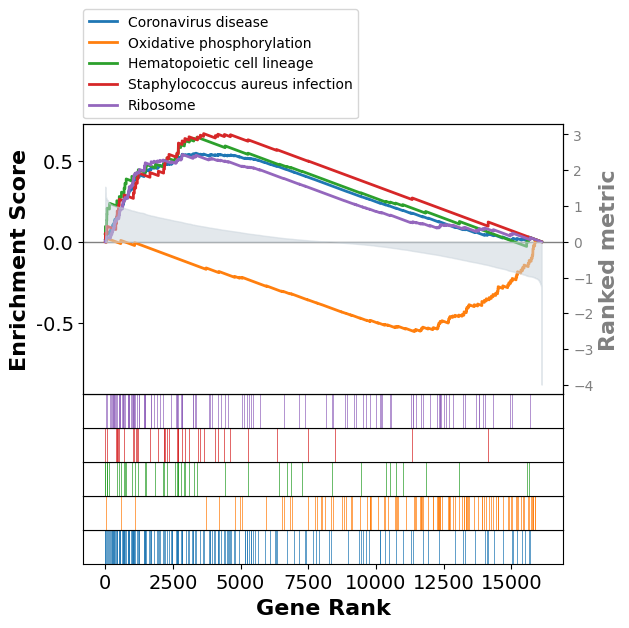

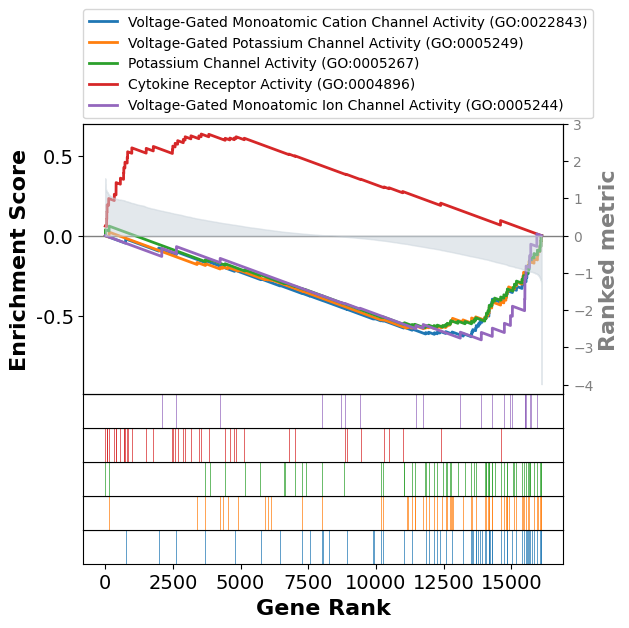

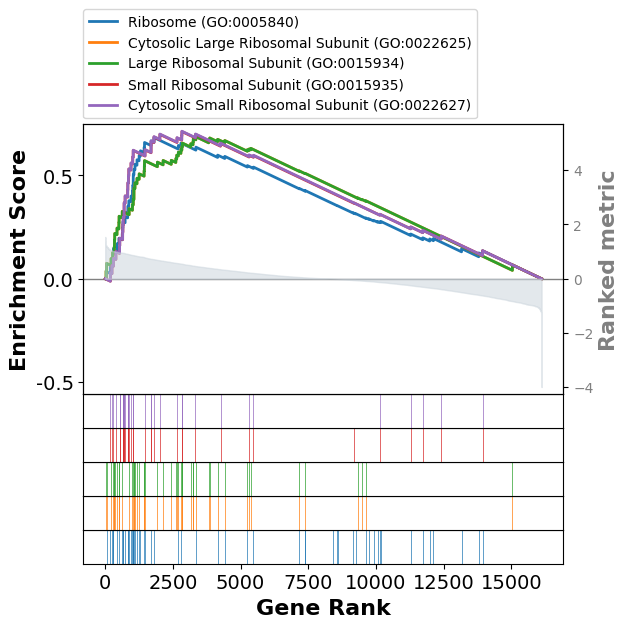

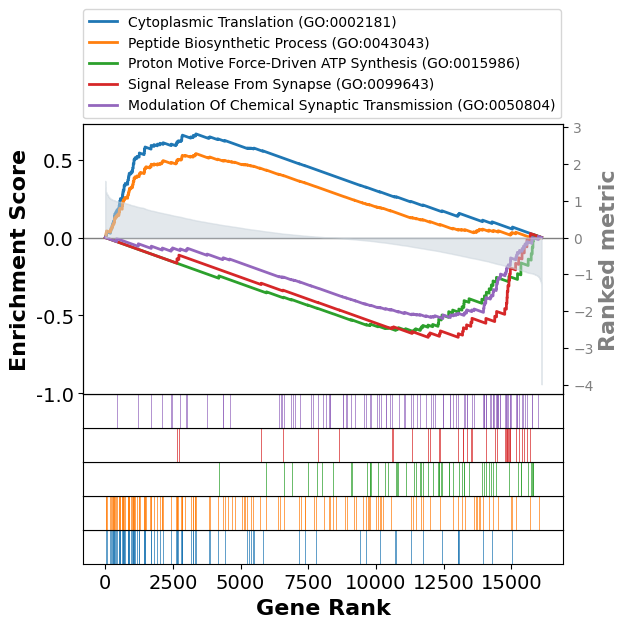

In [29]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

In [38]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df_result = result_analysis_A_C

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df_result = df_result.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df_result['ranking_metric'] = -np.log10(df_result['padj']) * np.sign(df_result['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df_result.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/A_C/ranked_list_A_C.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")

Ranked list saved to 'ranked_list.rnk'.


In [39]:
ranked_list

,ranking_metric
ENSG00000177989,1.415347
ENSG00000126709,0.256164
ENSG00000111801,0.256164
ENSG00000162692,0.256164
ENSG00000197921,0.011078
...,...
ENSG00000096654,-0.011078
ENSG00000237765,-0.011078
ENSG00000198171,-0.011078
ENSG00000138279,-0.011078


In [40]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:42<00:00, 410.02it/s]


,1
CIMAP1B,1.415347
IFI6,0.256164
BTN3A3,0.256164
VCAM1,0.256164
HES5,0.011078
...,...
ZNF184,-0.011078
FAM200B,-0.011078
DDRGK1,-0.011078
ANXA7,-0.011078


2024-07-08 10:41:07,174 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:41:07,183 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:41:07,185 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:41:07,185 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:41:07,186 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:41:07,193 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:41:07,193 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 10:41:07,194 [INFO] Start to run GSEA...Might take a while..................


Databases:  WikiPathway_2023_Human


2024-07-08 10:41:17,058 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:41:17,204 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:41:17,213 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:41:17,215 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:41:17,215 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:41:17,216 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:41:17,238 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:41:17,239 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 10:41:17,239 [INFO] Start to run GSEA...Might take a while..................


0                 Cytoplasmic Ribosomal Proteins WP477
1    Amplification And Expansion Of Oncogenic Pathw...
2    Photodynamic Therapy Induced NF kB Survival Si...
3                   Type II Interferon Signaling WP619
4       miRNA Role In Immune Response In Sepsis WP4329
5                      Synaptic Vesicle Pathway WP2267
6                                CAMKK2 Pathway WP4874
7    Platelet Mediated Interactions With Vascular A...
8            TYROBP Causal Network In Microglia WP3945
9           17P13 3 YWHAE Copy Number Variation WP5376
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 10:41:39,562 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:41:39,681 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:41:39,690 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:41:39,693 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:41:39,693 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:41:39,693 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:41:39,701 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:41:39,702 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 10:41:39,702 [INFO] Start to run GSEA...Might take a while..................


0                Peptide Chain Elongation R-HSA-156902
1       Eukaryotic Translation Elongation R-HSA-156842
2    Formation Of A Pool Of Free 40S Subunits R-HSA...
3               Selenocysteine Synthesis R-HSA-2408557
4       Eukaryotic Translation Termination R-HSA-72764
5                  Viral mRNA Translation R-HSA-192823
6    Nonsense Mediated Decay (NMD) Independent Of E...
7    Response Of EIF2AK4 (GCN2) To Amino Acid Defic...
8    L13a-mediated Translational Silencing Of Cerul...
9         Interferon Alpha/Beta Signaling R-HSA-909733
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 10:41:44,517 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:41:44,729 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:41:44,738 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:41:44,740 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:41:44,741 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:41:44,741 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:41:44,750 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:41:44,751 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 10:41:44,751 [INFO] Start to run GSEA...Might take a while..................


0          African trypanosomiasis
1        Graft-versus-host disease
2       Autoimmune thyroid disease
3              Coronavirus disease
4              Allograft rejection
5                          Malaria
6           Spinocerebellar ataxia
7    Amyotrophic lateral sclerosis
8                         Ribosome
9          Cell adhesion molecules
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 10:41:57,477 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:41:57,689 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:41:57,697 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:41:57,700 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:41:57,700 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:41:57,700 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:41:57,709 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:41:57,709 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 10:41:57,710 [INFO] Start to run GSEA...Might take a while..................


0                 Signal Sequence Binding (GO:0005048)
1    Oxidoreductase Activity, Acting On The CH-NH2 ...
2          Primary Amine Oxidase Activity (GO:0008131)
3         Cell Adhesion Mediator Activity (GO:0098631)
4    Transmitter-Gated Monoatomic Ion Channel Activ...
5    Voltage-Gated Monoatomic Cation Channel Activi...
6              Potassium Channel Activity (GO:0005267)
7    Acidic Amino Acid Transmembrane Transporter Ac...
8    Neurotransmitter Receptor Activity Involved In...
9     Ubiquitin Ligase Inhibitor Activity (GO:1990948)
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 10:42:03,503 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:42:03,667 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:42:03,675 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:42:03,678 [WARNING] Duplicated values found in preranked stats: 96.63% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:42:03,678 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:42:03,678 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:42:03,713 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:42:03,713 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 10:42:03,714 [INFO] Start to run GSEA...Might take a while..................


0       Cytosolic Small Ribosomal Subunit (GO:0022627)
1                 Small Ribosomal Subunit (GO:0015935)
2                 Large Ribosomal Subunit (GO:0015934)
3       Cytosolic Large Ribosomal Subunit (GO:0022625)
4                     MHC Protein Complex (GO:0042611)
5                                Podosome (GO:0002102)
6            MHC Class II Protein Complex (GO:0042613)
7                                Ribosome (GO:0005840)
8    Lumenal Side Of Endoplasmic Reticulum Membrane...
9                       Neuron Projection (GO:0043005)
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 10:43:02,493 [INFO] Congratulations. GSEApy runs successfully................



0                 Cytoplasmic Translation (GO:0002181)
1    Regulation Of Extrinsic Apoptotic Signaling Pa...
2    Adaptive Immune Response Based On Somatic Reco...
3    Regulation Of ERBB Signaling Pathway (GO:1901184)
4            Leukocyte Cell-Cell Adhesion (GO:0007159)
5          Chemical Synaptic Transmission (GO:0007268)
6    Negative Regulation Of Signal Transduction In ...
7    Negative Regulation Of Extrinsic Apoptotic Sig...
8            Lymphocyte Mediated Immunity (GO:0002449)
9            Defense Response To Symbiont (GO:0140546)
Name: Term, dtype: object


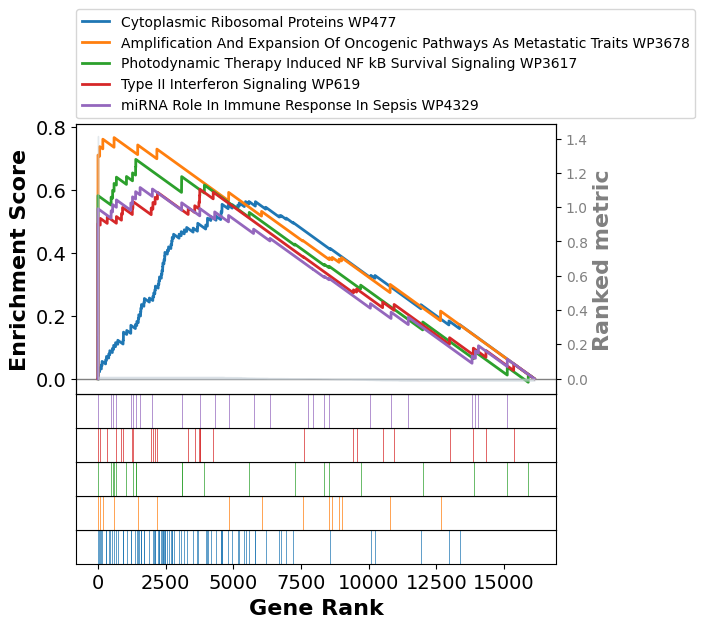

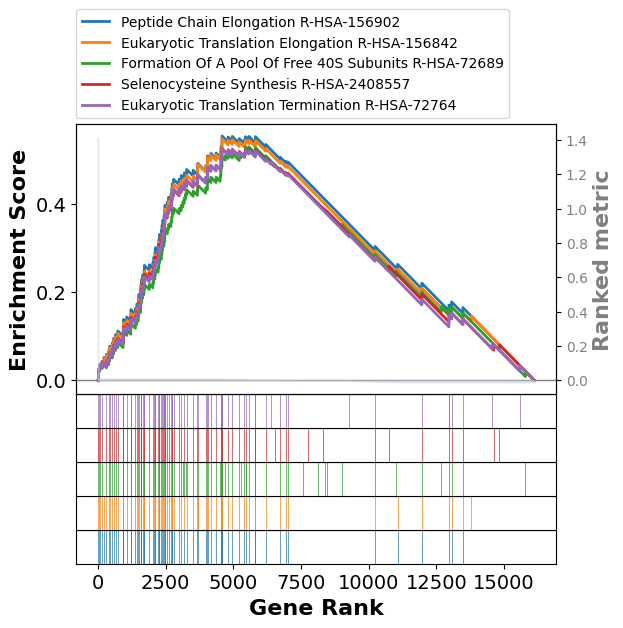

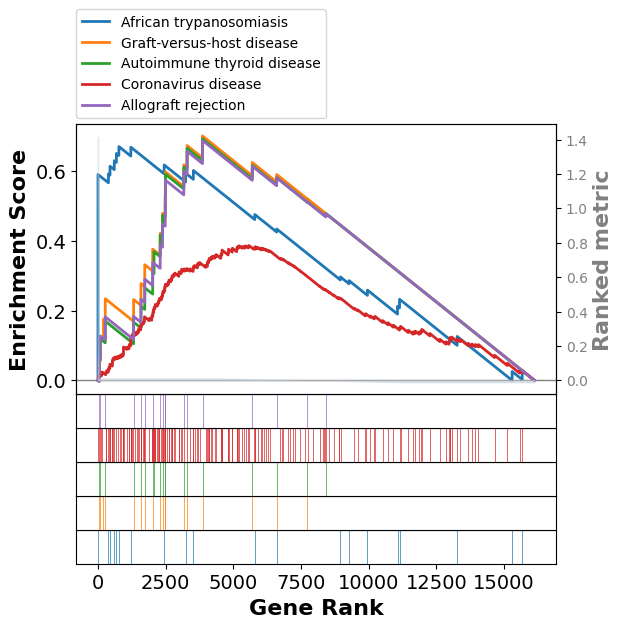

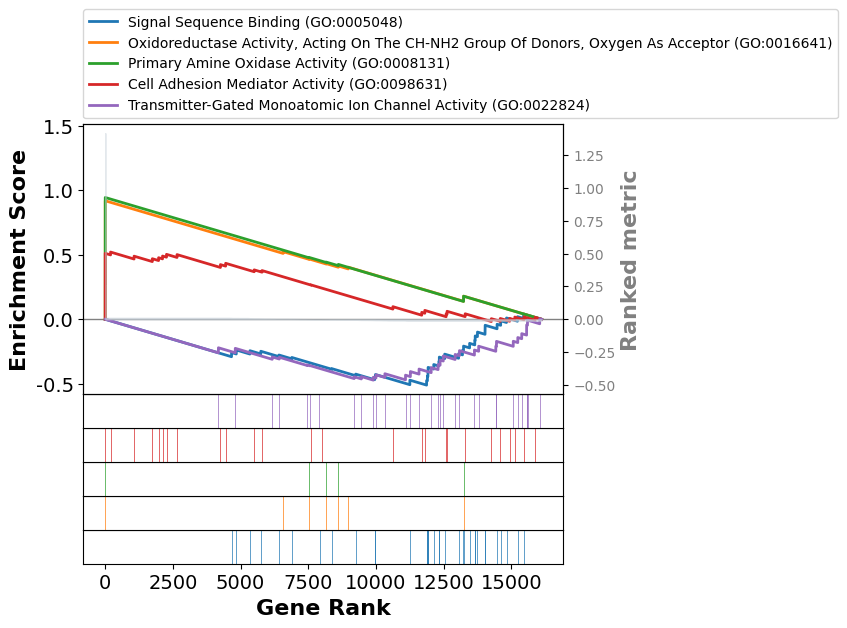

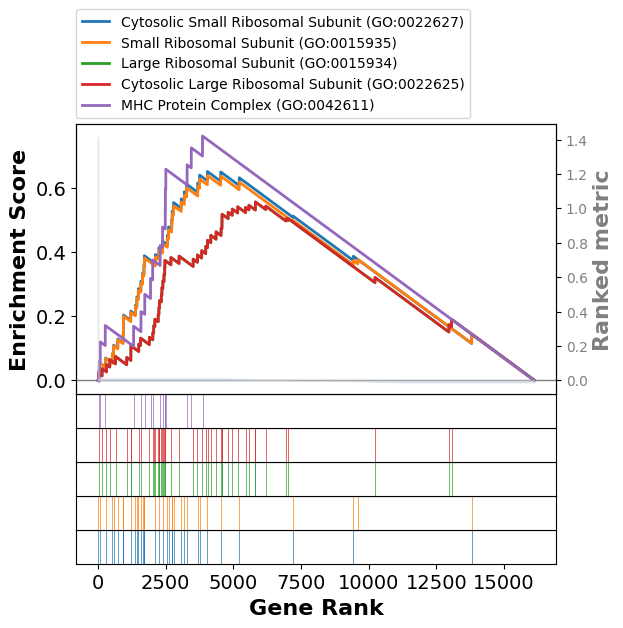

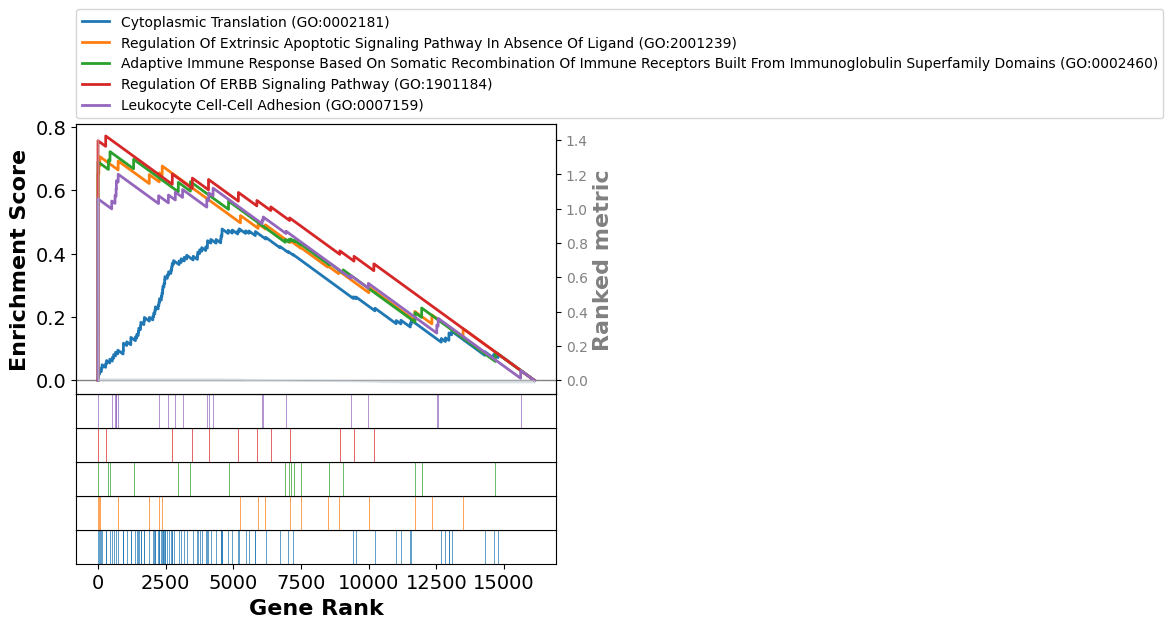

In [41]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022',  'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])

In [42]:
import pandas as pd
import numpy as np

# Load your DESeq2 results into a DataFrame
df_result = result_analysis_B_C

# Filter out rows with NA values in 'padj' and 'log2FoldChange' columns
df_result = df_result.dropna(subset=['padj', 'log2FoldChange'])

# Calculate the ranking metric
df_result['ranking_metric'] = -np.log10(df_result['padj']) * np.sign(df_result['log2FoldChange'])

# Sort the DataFrame by the ranking metric in descending order
df_sorted = df_result.sort_values(by='ranking_metric', ascending=False)
df_sorted
# Select the columns for the ranked list
ranked_list = df_sorted[['ranking_metric']]

# Save the ranked list to a file
ranked_list.to_csv("./different_expression_output/B_C/ranked_list_B_C.rnk", sep="\t", index=True, header=False)

print("Ranked list saved to 'ranked_list.rnk'.")

Ranked list saved to 'ranked_list.rnk'.


In [43]:
x = [return_gene_name(i) for i in tqdm(ranked_list.index)]
ranked_list.index = x
ranked_list = ranked_list.rename(columns={'ranking_metric':1})
ranked_list

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 17330/17330 [00:42<00:00, 407.34it/s]


,1
NaN,0.349061
DGCR6,0.349061
IFI6,0.349061
NaN,0.014697
VAX1,0.014697
...,...
CDK2AP1,-0.014697
ARAP3,-0.014697
ACBD7,-0.014697
GSTM2,-0.169610


2024-07-08 10:46:44,090 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:46:44,099 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:46:44,101 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:46:44,101 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:46:44,101 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:46:44,109 [INFO] 0047 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:46:44,110 [INFO] 0754 gene_sets used for further statistical testing.....
2024-07-08 10:46:44,110 [INFO] Start to run GSEA...Might take a while..................


Databases:  WikiPathway_2023_Human


2024-07-08 10:46:53,417 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:46:53,568 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:46:53,577 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:46:53,579 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:46:53,580 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:46:53,580 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:46:53,601 [INFO] 0131 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:46:53,601 [INFO] 1687 gene_sets used for further statistical testing.....
2024-07-08 10:46:53,602 [INFO] Start to run GSEA...Might take a while..................


0            TYROBP Causal Network In Microglia WP3945
1                             Complement System WP2806
2                                  NRF2 Pathway WP2884
3                Nuclear Receptors Meta Pathway WP2882
4                 Cytoplasmic Ribosomal Proteins WP477
5    NOTCH1 Regulation Of Endothelial Cell Calcific...
6    Leukocyte Intrinsic Hippo Pathway Functions WP...
7                   Type II Interferon Signaling WP619
8            Complement And Coagulation Cascades WP558
9        Angiotensin II Receptor Type 1 Pathway WP5036
Name: Term, dtype: object
Databases:  Reactome_2022


2024-07-08 10:47:14,533 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:47:14,686 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:47:14,694 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:47:14,696 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:47:14,697 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:47:14,697 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:47:14,704 [INFO] 0003 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:47:14,704 [INFO] 0317 gene_sets used for further statistical testing.....
2024-07-08 10:47:14,704 [INFO] Start to run GSEA...Might take a while..................


0                         Neuronal System R-HSA-112316
1      Integrin Cell Surface Interactions R-HSA-216083
2        Regulation Of Complement Cascade R-HSA-977606
3       Voltage Gated Potassium Channels R-HSA-1296072
4    Protein-protein Interactions At Synapses R-HSA...
5     Interaction Between L1 And Ankyrins R-HSA-445095
6      Extracellular Matrix Organization R-HSA-1474244
7    Interleukin-4 And Interleukin-13 Signaling R-H...
8               Interleukin-10 Signaling R-HSA-6783783
9         Phase 0 - Rapid Depolarisation R-HSA-5576892
Name: Term, dtype: object
Databases:  KEGG_2021_Human


2024-07-08 10:47:19,251 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:47:19,608 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:47:19,616 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:47:19,619 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:47:19,619 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:47:19,619 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:47:19,629 [INFO] 0151 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:47:19,629 [INFO] 0996 gene_sets used for further statistical testing.....
2024-07-08 10:47:19,629 [INFO] Start to run GSEA...Might take a while..................


0       Complement and coagulation cascades
1                Hematopoietic cell lineage
2           Staphylococcus aureus infection
3                 Oxidative phosphorylation
4    Cytokine-cytokine receptor interaction
5                        Nicotine addiction
6                             Leishmaniasis
7                 Th17 cell differentiation
8                  ECM-receptor interaction
9                  Hepatocellular carcinoma
Name: Term, dtype: object
Databases:  GO_Molecular_Function_2023


2024-07-08 10:47:31,598 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:47:31,712 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:47:31,721 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:47:31,723 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:47:31,723 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:47:31,723 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:47:31,732 [INFO] 0037 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:47:31,732 [INFO] 0437 gene_sets used for further statistical testing.....
2024-07-08 10:47:31,732 [INFO] Start to run GSEA...Might take a while..................


0              Cytokine Receptor Activity (GO:0004896)
1    Voltage-Gated Monoatomic Cation Channel Activi...
2    High Voltage-Gated Calcium Channel Activity (G...
3    Voltage-Gated Potassium Channel Activity (GO:0...
4              Potassium Channel Activity (GO:0005267)
5        Glutathione Transferase Activity (GO:0004364)
6                    Neuropeptide Binding (GO:0042923)
7                   Wnt Receptor Activity (GO:0042813)
8    NADH Dehydrogenase (Ubiquinone) Activity (GO:0...
9    Transmembrane Receptor Protein Kinase Activity...
Name: Term, dtype: object
Databases:  GO_Cellular_Component_2023


2024-07-08 10:47:37,514 [INFO] Congratulations. GSEApy runs successfully................

2024-07-08 10:47:37,650 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!
2024-07-08 10:47:37,658 [INFO] Input gene rankings contains duplicated IDs
2024-07-08 10:47:37,661 [WARNING] Duplicated values found in preranked stats: 96.49% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-07-08 10:47:37,661 [INFO] Parsing data files for GSEA.............................
2024-07-08 10:47:37,661 [INFO] Enrichr library gene sets already downloaded in: /home/anwer/.cache/gseapy, use local file
2024-07-08 10:47:37,695 [INFO] 0577 gene_sets have been filtered out when max_size=1000 and min_size=5
2024-07-08 10:47:37,696 [INFO] 4830 gene_sets used for further statistical testing.....
2024-07-08 10:47:37,696 [INFO] Start to run GSEA...Might take a while..................


0                          Focal Adhesion (GO:0005925)
1                 Cell-Substrate Junction (GO:0030055)
2                       Neuron Projection (GO:0043005)
3    Collagen-Containing Extracellular Matrix (GO:0...
4    Postsynaptic Specialization Membrane (GO:0099634)
5                                    Axon (GO:0030424)
6    Voltage-Gated Potassium Channel Complex (GO:00...
7                 Calcium Channel Complex (GO:0034704)
8             Respiratory Chain Complex I (GO:0045271)
9    Mitochondrial Respiratory Chain Complex I (GO:...
Name: Term, dtype: object
Databases:  GO_Biological_Process_2023


2024-07-08 10:48:34,262 [INFO] Congratulations. GSEApy runs successfully................



0    Positive Regulation Of Epithelial To Mesenchym...
1    Release Of Cytochrome C From Mitochondria (GO:...
2                     Aorta Morphogenesis (GO:0035909)
3    Regulation Of Synaptic Transmission, Glutamate...
4    Positive Regulation Of Vasculature Development...
5    Epithelial To Mesenchymal Transition (GO:0001837)
6              Regulation Of Angiogenesis (GO:0045765)
7    Modulation Of Chemical Synaptic Transmission (...
8              Cellular Response To Virus (GO:0098586)
9    Long-Chain Fatty Acid Biosynthetic Process (GO...
Name: Term, dtype: object


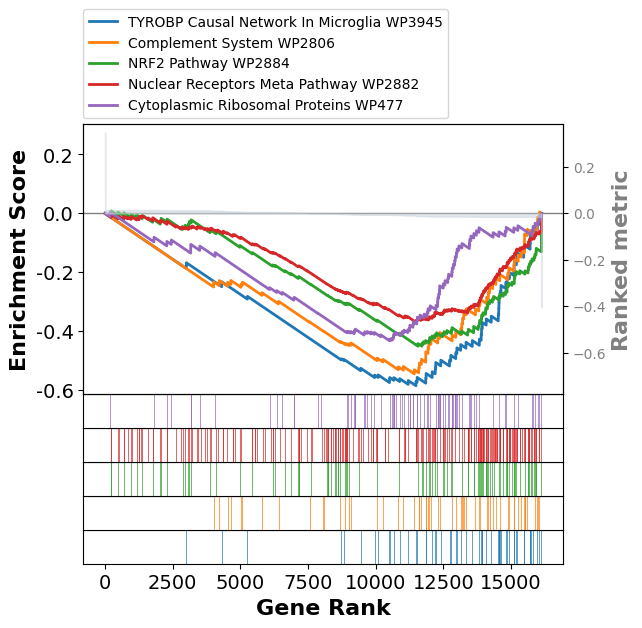

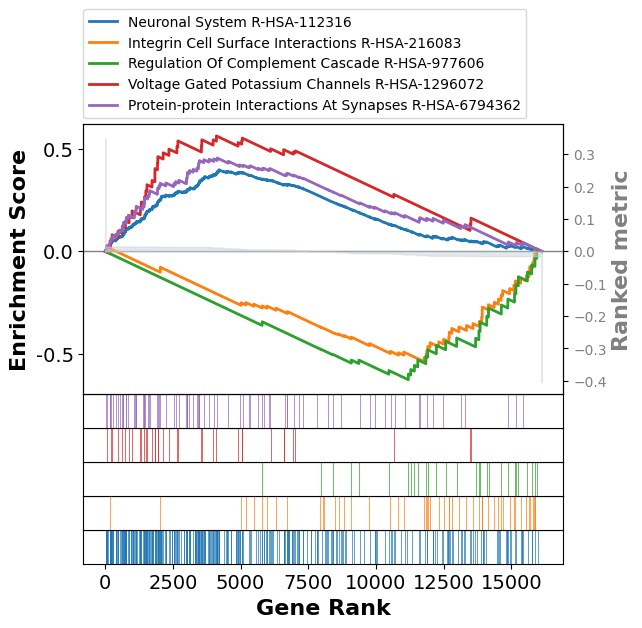

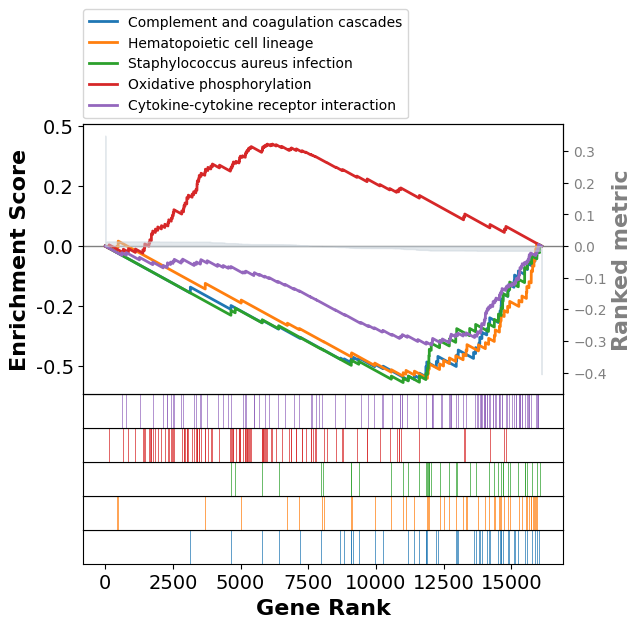

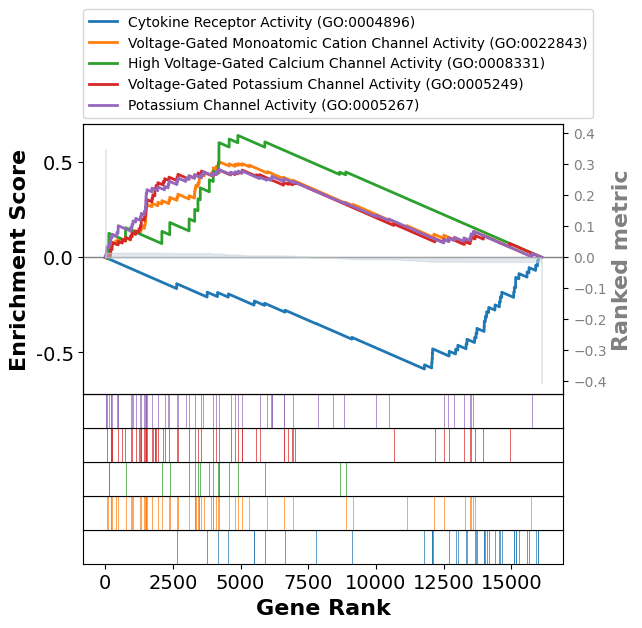

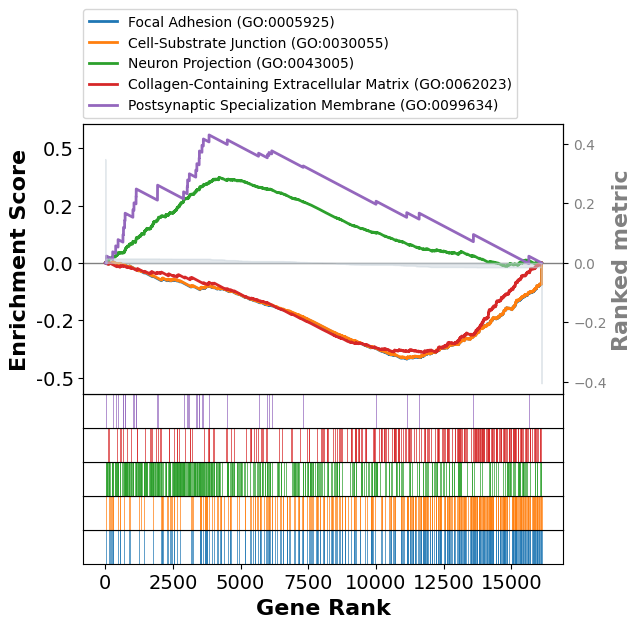

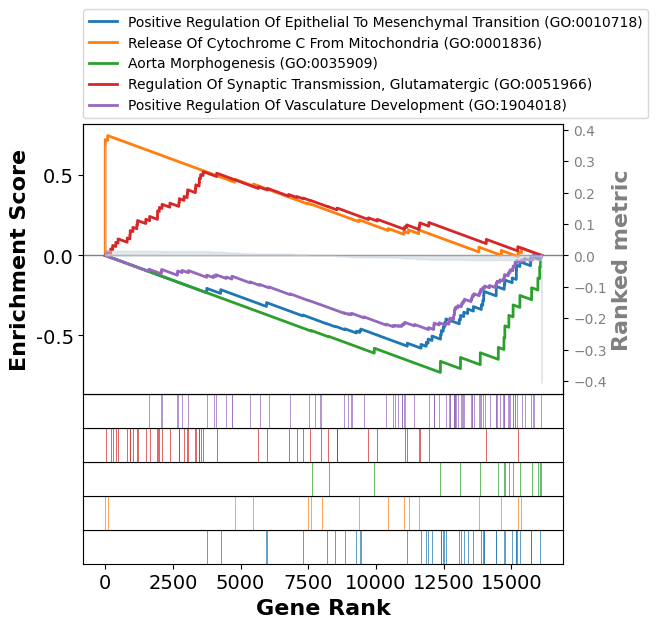

In [45]:
import gseapy as gp
from gseapy import dotplot

databases = ['WikiPathway_2023_Human', 'Reactome_2022', 'KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023',
             'GO_Biological_Process_2023']

for i in databases:
    print('Databases: ', i)
    pre_res = gp.prerank(rnk=ranked_list, # or rnk = rnk,
                         gene_sets=i,
                         threads=4,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000, # reduce number to speed up testing
                         outdir=None, # don't write to disk
                         seed=6,
                         verbose=True, # see what's going on behind the scenes
                        )
    
    
    pre_res.res2d.head(5)
    
    terms = pre_res.res2d.Term
    #axs = pre_res.plot(terms=terms[1])
    
    
    axs = pre_res.plot(terms=terms[0:5],
                       #legend_kws={'loc': (1.2, 0)}, # set the legend loc
                       show_ranking=True, # whether to show the second yaxis
                       figsize=(3,4)
                      )
    print(terms[0:10])